#***Logistic Regression***

###Multiclass classification



In [1]:
#importing pandas, numpy and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the required file to proceed
logistic=pd.read_csv('/content/drive/MyDrive/classification_train.csv')
print(logistic.shape)

#creating a 2D array
x_train=np.zeros((30000,786))

#importing values from polynomial train to the array x_train
x_train = logistic.loc[:,:]

(30000, 786)


In [3]:
#creating array
x_train=np.array(x_train)
y_test= np.array(x_train[:,1])

#removing 1st and 2nd column

x_train=np.delete(x_train,0,axis=1)
x_train=np.delete(x_train,0,axis=1)
y_test=y_test.reshape(30000,1)

In [4]:
#This normalise X
def normalise(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_n=(x-mean)/std
  return x_n
  
x_train=normalise(x_train)
print(x_train.shape)

(30000, 784)


In [5]:
#creating a new 30000,10 array from y_test
y_Test=np.zeros((30000,10))

#this function takes the value and create a 30000 x 10 array like 0 0 1 0....0 0 
def change(g):
  for i in range (30000):
    p=int(y_test[i])
    y_Test[i,p]=1
  return y_Test

y_Test= change(y_test)
w=np.zeros((784,10))
b=0

In [6]:
#sigmoid function
def sigmoid(x,w,b):
  z=np.dot(x,w) + b
  return 1/(1+np.exp(-z))

In [7]:
#This return an array (prediction)
def prediction(s):
  return np.argmax(s , axis=1)

In [8]:
#to calculate rms error function
def Rms(predictions, targets):
      return np.sqrt(((predictions - targets) ** 2).mean())

In [9]:
#return the cost of the prediction
def cost(x,y,w,b):
  f=sigmoid(x,w,b)
  L=np.sum(y*(np.log(f))+(1-y)*(np.log(1-f)))
  J=-L/60000
  return J

#Let's see the cost 
cost(x_train,y_Test,w,b)  

3.4657359027997234

In [10]:
#This calculates dJ/dw and dJ/db and returns that 
def gradient(x,y,w,b):
  dj_dw=np.zeros((784,10))
  m=x.shape[0]
  f=sigmoid(x,w,b)
  dj_db=np.sum(f-y)/m 
  dj_dw=np.dot(x.T,f-y)/m 
  return dj_dw, dj_db

cost after 0 iterations is: 3.0076438288810077
cost after 100 iterations is: 0.6459931358543786
cost after 200 iterations is: 0.5504508973050647
cost after 300 iterations is: 0.5127762113533736
cost after 400 iterations is: 0.49151897219515095
cost after 500 iterations is: 0.47742789461751467
cost after 600 iterations is: 0.46718455561487104
cost after 700 iterations is: 0.45928179005704484
cost after 800 iterations is: 0.4529272598984125
cost after 900 iterations is: 0.4476603205991737
final w 
 [[-0.00733567 -0.0006022  -0.01088625 ...  0.00071712 -0.01073646
  -0.0013612 ]
 [ 0.02719111 -0.00398688 -0.02416946 ...  0.00066822  0.00582058
   0.00980084]
 [ 0.02998733 -0.01002235  0.02318799 ...  0.00079785 -0.04841969
   0.00124457]
 ...
 [-0.03091915 -0.01346599  0.04782989 ... -0.001629   -0.0278364
   0.00246104]
 [-0.02226959 -0.00929411  0.02686293 ... -0.00600084 -0.02266506
   0.02290632]
 [ 0.00131763 -0.00558147  0.04675959 ... -0.00055147 -0.04358558
   0.00980965]]
final b

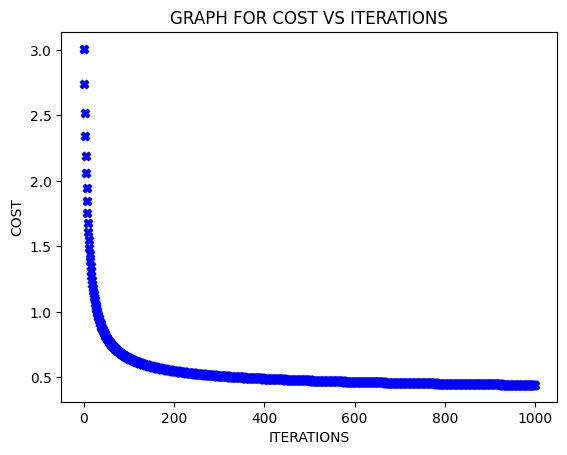

In [11]:
def gradient_descent(x,w,b,y,alpha):
  for i in range(iterations):
    dj_dw_f, dj_db_f= gradient(x,y,w,b)
    w= w - alpha*dj_dw_f
    b= b - alpha*dj_db_f
    h=cost(x,y,w,b)
    if i%100==0:
      print("cost after",i,"iterations is:", h)
    plt.scatter(i,h,marker='X',c='b')
    plt.title("GRAPH FOR COST VS ITERATIONS")
    plt.xlabel("ITERATIONS")
    plt.ylabel("COST")
  return w,b
iterations=1000
alpha=0.03
w,b= gradient_descent(x_train,w,b,y_Test,alpha)
print("final w \n",w)
print("final b",b)

In [13]:
f=sigmoid(x_train,w,b)
y_predicted=prediction(f)
y_predicted=y_predicted.reshape(30000,1)
c=0
for j in range(30000):
  if y_test[j]==y_predicted[j]:
    c+=1
print("Accuracy : ",c/300)

Accuracy :  84.53333333333333
